In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (14, 7)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

In [2]:
class LinearRegression:
    '''
    A class which implements linear regression model with gradient descent.
    '''
    def __init__(self, learning_rate=0.01, n_iterations=10000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.parameters = {"W": None, "b": None}
        self.loss = []
        
    @staticmethod
    def _mean_squared_error(y, y_hat):
        '''
        Private method, used to evaluate loss at each iteration.
        
        :param: y - array, true values
        :param: y_hat - array, predicted values
        :return: float
        '''
        m = y_hat.shape[0]
        error = 1/m * np.mean(np.square(y_hat - y))
        return error
    
    def fit(self, X, y, optimizer="gradient descent", beta1=0.9, beta2=0.999, epsilon=1e-8):
        '''
        Used to calculate the coefficient of the linear regression model.
        
        :param X: array, features
        :param y: array, true values
        :return: None
        '''
        # 1. Initialize weights and bias to zeros
        m = X.shape[0]
        y = y.reshape(-1, 1)
        self.parameters["W"], self.parameters["b"] = np.zeros((X.shape[1], 1)), 0 # np.zeros((X.shape[0], 1))
        grads = {}
        v, s, v_correct, s_correct = ({},) * 4
        t = 0
        for key, shape in zip(["W", "dW", "b", "db"], 
                              [self.parameters["W"].shape, self.parameters["W"].shape, 1, 1]):
            v[key], s[key] = np.zeros(shape), np.zeros(shape)
    
        # 2. Perform gradient descent
        for i in range(self.n_iterations):
            # Line equation
            y_hat = np.dot(X, self.parameters["W"]) + self.parameters["b"]
            loss = self._mean_squared_error(y, y_hat)
            self.loss.append(loss)
            
            # Calculate derivatives
            grads["dW"] = 1 / m * np.dot(X.T, (y_hat - y))  # 2 *
            grads["db"] = 1 / m * np.sum(y_hat - y) # 2 *
            
            # Update the coefficients
            if optimizer == "gradient descent":
                for key, d_key in zip(["W", "b"], ["dW", "db"]):
                    self.parameters[key] -= self.learning_rate * grads[d_key]
            if optimizer == "adam":
                t += 1
                for key, d_key in zip(["W", "b"], ["dW", "db"]):
                    v[d_key] = beta1 * v[d_key] + (1 - beta1) * grads[d_key]
                    s[d_key] = beta2 * s[d_key] + (1 - beta2) * np.square(grads[d_key])
                    v_correct[d_key] = v[d_key] / (1 - np.power(beta1, t))
                    s_correct[d_key] = s[d_key] / (1 - np.power(beta2, t))
                    self.parameters[key] -= self.learning_rate * v_correct[d_key] / (np.sqrt(abs(s_correct[d_key])) + epsilon)
                
        
        
    def predict(self, X):
        '''
        Makes predictions using the line equation.
        
        :param X: array, features
        :return: array, predictions
        '''
        W, b = self.parameters["W"], self.parameters["b"]
        return np.dot(X, W) + b

In [3]:
from sklearn.datasets import load_diabetes

data = load_diabetes()
X = data.data
y = data.target

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train, optimizer="adam")
preds = model.predict(X_test)

<ipython-input-2-9bce004d5cee>:78: RuntimeWarning: overflow encountered in true_divide
  s_correct[d_key] = s[d_key] / (1 - np.power(beta2, (t)))
<ipython-input-2-9bce004d5cee>:81: RuntimeWarning: invalid value encountered in true_divide
  self.parameters[key] -= self.learning_rate * v_correct[d_key] / (np.sqrt(abs(s_correct[d_key])) + epsilon)


In [5]:
y_test.shape

(89,)

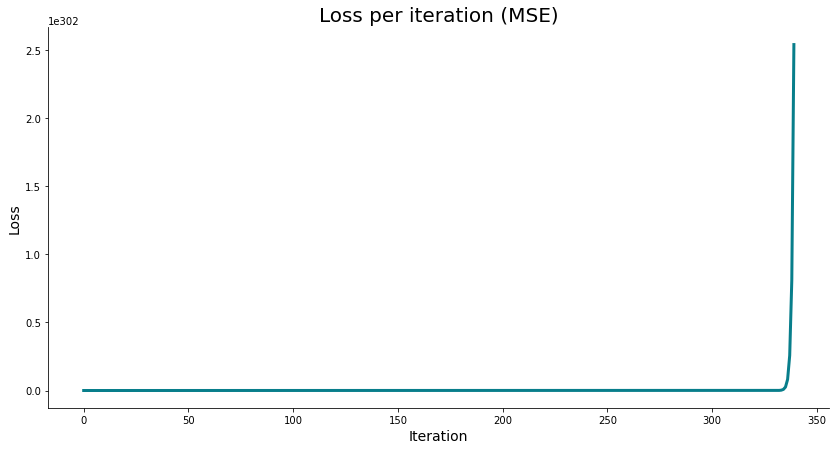

In [6]:
xs = np.arange(len(model.loss))
ys = model.loss

plt.plot(xs, ys, lw=3, c='#087E8B')
plt.title('Loss per iteration (MSE)', size=20)
plt.xlabel('Iteration', size=14)
plt.ylabel('Loss', size=14)
plt.show()

C:\Users\fqdg1\.conda\envs\ml\lib\site-packages\numpy\core\_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
<ipython-input-2-9bce004d5cee>:78: RuntimeWarning: overflow encountered in true_divide
  s_correct[d_key] = s[d_key] / (1 - np.power(beta2, (t)))
<ipython-input-2-9bce004d5cee>:81: RuntimeWarning: invalid value encountered in true_divide
  self.parameters[key] -= self.learning_rate * v_correct[d_key] / (np.sqrt(abs(s_correct[d_key])) + epsilon)


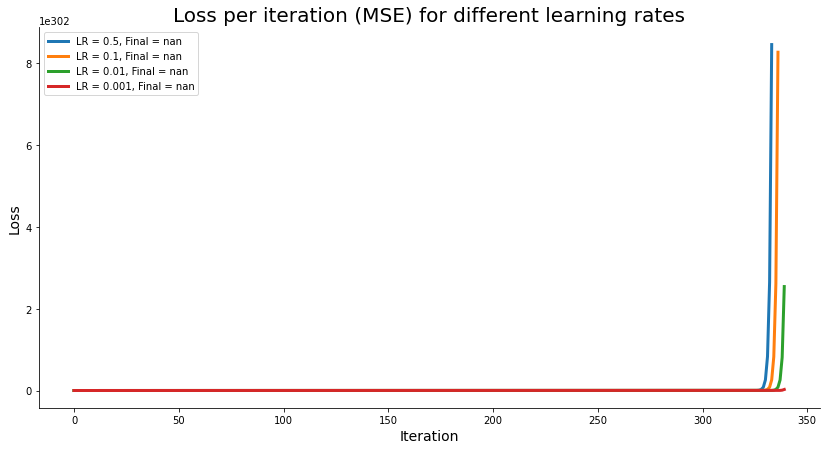

In [7]:
losses = {}
for lr in [0.5, 0.1, 0.01, 0.001]:
    model = LinearRegression(learning_rate=lr)
    model.fit(X_train, y_train, optimizer="adam")
    losses[f'LR={str(lr)}'] = model.loss
    
    
xs = np.arange(len(model.loss))

plt.plot(xs, losses['LR=0.5'], lw=3, label=f"LR = 0.5, Final = {losses['LR=0.5'][-1]:.2f}")
plt.plot(xs, losses['LR=0.1'], lw=3, label=f"LR = 0.1, Final = {losses['LR=0.1'][-1]:.2f}")
plt.plot(xs, losses['LR=0.01'], lw=3, label=f"LR = 0.01, Final = {losses['LR=0.01'][-1]:.2f}")
plt.plot(xs, losses['LR=0.001'], lw=3, label=f"LR = 0.001, Final = {losses['LR=0.001'][-1]:.2f}")
plt.title('Loss per iteration (MSE) for different learning rates', size=20)
plt.xlabel('Iteration', size=14)
plt.ylabel('Loss', size=14)
plt.legend()
plt.show()

In [8]:
model = LinearRegression(learning_rate=0.5)
model.fit(X_train, y_train, optimizer="adam")
preds = model.predict(X_test)

model._mean_squared_error(y_test, preds)

C:\Users\fqdg1\.conda\envs\ml\lib\site-packages\numpy\core\_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
<ipython-input-2-9bce004d5cee>:78: RuntimeWarning: overflow encountered in true_divide
  s_correct[d_key] = s[d_key] / (1 - np.power(beta2, (t)))
<ipython-input-2-9bce004d5cee>:81: RuntimeWarning: invalid value encountered in true_divide
  self.parameters[key] -= self.learning_rate * v_correct[d_key] / (np.sqrt(abs(s_correct[d_key])) + epsilon)


nan

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

mean_squared_error(y_test, lr_preds)

2900.173287883232

In [10]:
np.zeros((1))

array([0.])

In [11]:
def generate_data(nb):
    x = np.array([])
    y = np.array([])
    for i in range(nb):
        x = np.insert(x, len(x), 1)
        y = np.insert(y, len(y), 1/2 + np.random.rand()*20)
    return x, y

generate_data(5)[0] * generate_data(5)[1]

array([18.17375664, 11.53140776, 17.66936206,  8.30986781, 15.12377853])